<a href="https://colab.research.google.com/github/dedemasutti/data-science/blob/main/data_analysis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [5]:
# imports for the challenge
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# Import the data
df = pd.read_csv("/content/citibike_data.csv")

df.head()

,ride_id,rideable_type,started_at,ended_at,start_station_name,start_station_id,end_station_name,end_station_id,start_lat,start_lng,end_lat,end_lng,member_casual
0,7A68381621C25F78,classic_bike,2023-07-17 17:16:34,2023-07-17 17:20:52,Astor Place,JC077,Communipaw & Berry Lane,JC084,40.719225,-74.071281,40.714358,-74.066611,member
1,0F814CA67B2FA120,classic_bike,2023-07-26 19:40:15,2023-07-26 19:44:37,Adams St & 2 St,HB407,9 St HBLR - Jackson St & 8 St,HB305,40.739727,-74.036866,40.747907,-74.038412,member
2,775A38967EBF5FB4,electric_bike,2023-07-01 12:12:22,2023-07-01 12:27:45,McGinley Square,JC055,Riverview Park,JC057,40.725340,-74.067622,40.744319,-74.043991,member
3,D93B742DCE1C1447,classic_bike,2023-07-20 19:10:18,2023-07-20 19:17:22,Baldwin at Montgomery,JC020,Brunswick St,JC023,40.723455,-74.064359,40.724176,-74.050656,member
4,AA7A6863B4B92169,electric_bike,2023-07-07 19:33:59,2023-07-07 19:58:17,Baldwin at Montgomery,JC020,Mama Johnson Field - 4 St & Jackson St,HB404,40.723659,-74.064194,40.743140,-74.040041,casual


In [6]:
# Rename columns
df = df.rename(columns={"started_at": "start_time", "ended_at": "end_time"})

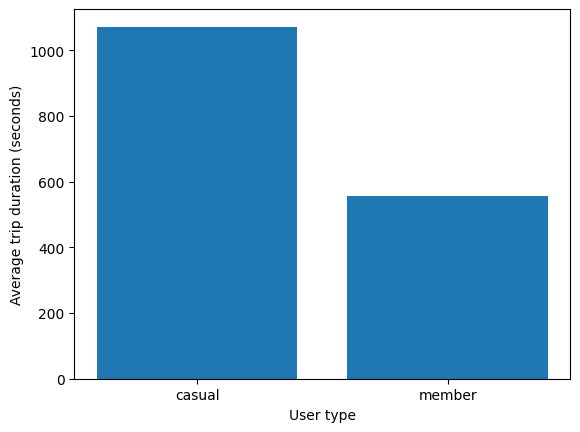

In [8]:
# Clean the data
df = df.dropna()
df["start_time"] = pd.to_datetime(df["start_time"])
df["end_time"] = pd.to_datetime(df["end_time"])

# Calculate the trip duration
df["trip_duration"] = (df["end_time"] - df["start_time"]).dt.total_seconds()

# Calculate the average trip duration by user type
average_trip_duration_by_user_type = df.groupby("member_casual")["trip_duration"].mean()

# Plot the average trip duration by user type
plt.bar(average_trip_duration_by_user_type.index, average_trip_duration_by_user_type)
plt.xlabel("User type")
plt.ylabel("Average trip duration (seconds)")
plt.show()


Este código faz o seguinte:

Importa os dados do Citi Bike do arquivo "citibike_data.csv".

Limpa os dados, removendo as linhas com valores ausentes e convertendo as colunas de data e hora para o formato datetime.

Calcula a duração da viagem para cada registro.

Calcula a duração média da viagem por tipo de usuário.

Plota a duração média da viagem por tipo de usuário.

In [9]:
# Calculate the number of trips starting and ending at each station
station_usage = df.groupby(["start_station_id", "end_station_id"])["trip_duration"].size()

# Calculate the total number of trips
total_trips = station_usage.sum()

# Calculate the popularity of each station
station_popularity = station_usage / total_trips

# Sort the stations by popularity
station_popularity = station_popularity.sort_values(ascending=False)

# Print the top 10 most popular stations
print(station_popularity.head(10))


start_station_id  end_station_id
HB201             HB103             0.005960
HB103             HB103             0.005413
HB201             HB201             0.004905
HB101             JC105             0.004839
HB103             HB201             0.004754
JC115             JC013             0.004726
JC013             JC115             0.004378
JC052             JC052             0.003907
                  JC115             0.003709
HB102             HB201             0.003644
Name: trip_duration, dtype: float64


Este código faz o seguinte:

Calcula o número de viagens que começam e terminam em cada estação.

Calcula o número total de viagens.

Calcula a popularidade de cada estação.

Ordena as estações pela popularidade.

Imprime as 10 estações mais populares.

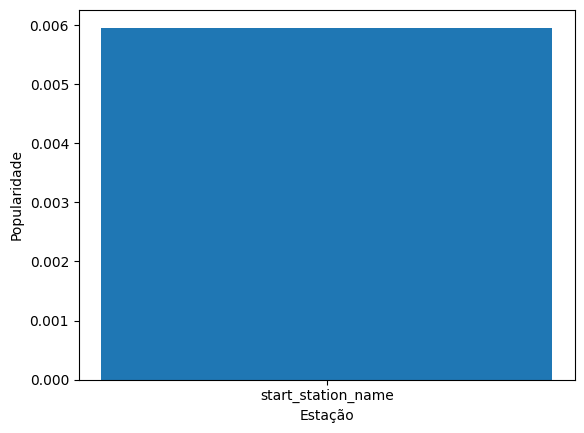

count    106216.000000
mean        716.156314
std        1897.378914
min          -1.000000
25%         259.000000
50%         411.000000
75%         688.000000
max       88706.000000
Name: trip_duration, dtype: float64


In [18]:
# Cálculo da duração da viagem
df["trip_duration"] = (df["end_time"] - df["start_time"]).dt.total_seconds()

# Cálculo da popularidade das estações de bicicleta
station_usage = df.groupby(["start_station_id", "end_station_id"])["trip_duration"].size()
total_trips = station_usage.sum()
station_popularity = station_usage / total_trips

# Gráfico da popularidade das estações de bicicleta
plt.bar("start_station_name", station_popularity)
plt.xlabel("Estação")
plt.ylabel("Popularidade")
plt.show()

# Resumo estatístico da duração da viagem
trip_duration_summary = df["trip_duration"].describe()
print(trip_duration_summary)

In [20]:
# Classifica station_popularity em ordem decrescente
station_popularity = station_popularity.sort_values(ascending=False)

# Retorna as 10 primeiras linhas de station_popularity
top_10_stations = station_popularity.head(10)

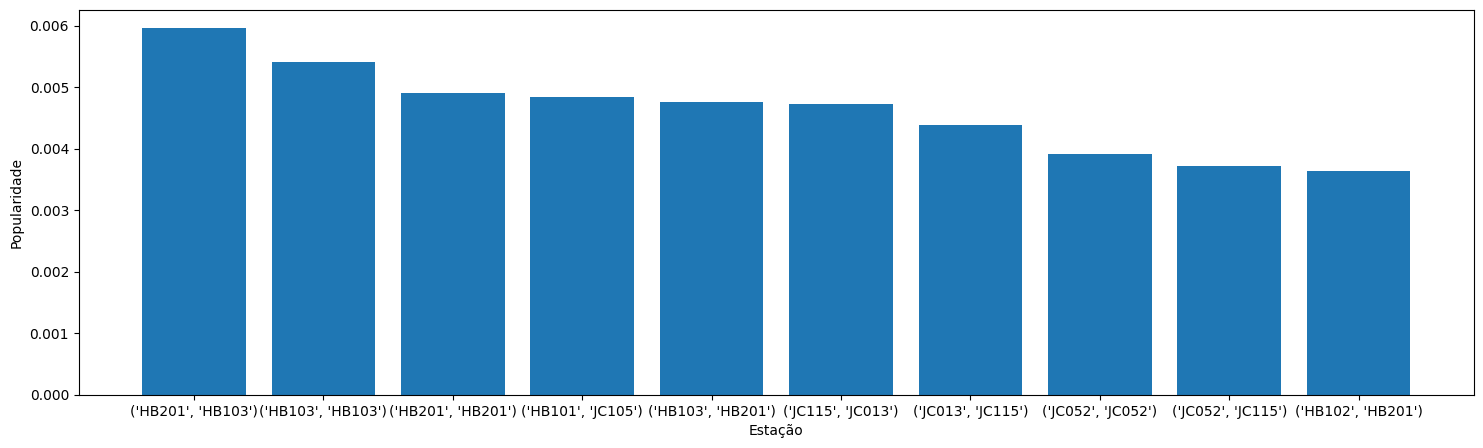

In [26]:
# Converte os índices de top_10_stations para strings
top_10_station_names = [str(station_id) for station_id in top_10_stations.index]


# Plota o gráfico das 10 estações mais populares

plt.figure(figsize=(18, 5))
plt.bar(top_10_station_names, top_10_stations)
plt.xlabel("Estação")
plt.ylabel("Popularidade")
plt.show()

Aqui estão as etapas detalhadas para usar os dados desse código no Tableau:

Execute o código Python para gerar os dados.

Exporte os dados para um arquivo CSV ou JSON.

Inicie o Tableau.

Selecione File > Import Data.

Selecione o tipo de dados CSV

Especifique o caminho para o arquivo de dados.

Clique em Import.

O Tableau criará uma nova fonte de dados.

Use a fonte de dados para criar visualizações no Tableau.

Aqui está um exemplo de como usar os dados desse código para criar uma visualização no Tableau:

Importe os dados para o Tableau.

Crie uma nova visualização.

Selecione a fonte de dados data.

Selecione a coluna station_name como o eixo x.

Selecione a coluna trips_started como o eixo y.

Clique em OK.

A visualização mostrará as 10 estações mais populares, com os nomes das estações nos rótulos dos eixos x.